In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split

In [5]:
google_train = pd.read_csv ("/content/Google_Stock_Price_Train (1).csv")
google_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [6]:
training_set = google_train.iloc [: , 1:2].values

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range = (0,1))
training_scaling = scaling.fit_transform(training_set)

In [9]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
  X_train.append(training_scaling[i-60:i, 0])
  y_train.append(training_scaling[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [11]:
regressor = Sequential()

add the LSTM layers and dropout

In [12]:
#first layer
regressor.add (LSTM (units = 50 , return_sequences = True , input_shape = (X_train.shape [1],1)))
regressor.add (Dropout (0.2))

In [13]:
#second layer
regressor.add (LSTM (units = 50 , return_sequences = True ))
regressor.add (Dropout (0.2))

In [14]:
#third layer
regressor.add (LSTM (units = 50 , return_sequences = True ))
regressor.add (Dropout (0.2))

In [15]:
#fourth layer
regressor.add (LSTM (units = 50 ))
regressor.add (Dropout (0.2))

In [16]:
#output layer
regressor.add (Dense (units=1))

In [17]:
#compiling the RNN
regressor.compile(optimizer = 'adam' , loss = "mean_squared_error")

In [18]:
regressor.fit (X_train,y_train , epochs=100, batch_size = 32 )

Epoch 1/100
38/38 [==============================] - 12s 110ms/step - loss: 0.0455
Epoch 2/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0063
Epoch 3/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0055
Epoch 4/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0050
Epoch 6/100
38/38 [==============================] - 5s 135ms/step - loss: 0.0058
Epoch 7/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0053
Epoch 8/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0044
Epoch 9/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0042
Epoch 10/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0040
Epoch 11/100
38/38 [==============================] - 5s 135ms/step - loss: 0.0041
Epoch 12/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0043
Epoch 13/100

In [24]:
dataset_test = pd.read_csv ("/content/Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc [: , 1:2].values

In [25]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((google_train[ 'Open'],dataset_test['Open']),axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test)- 60:]. values
inputs = inputs.reshape(-1,1)
inputs = scaling. transform(inputs)
X_test = []
for i in range (60, 80):
  X_test.append (inputs [i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test. shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaling.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 47ms/step


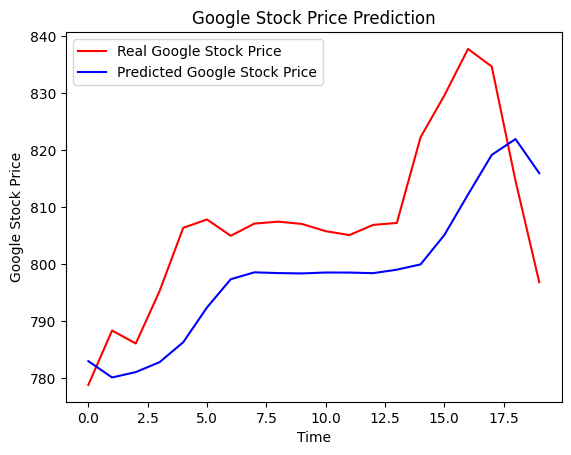

In [26]:
# Visualize the results of predicted and real stock price
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel( 'Time')
plt.ylabel( 'Google Stock Price')
plt.legend()
plt.show()